# ELM463-Dönem Projesi
## Merve Uzuner-1801022033

# Eğitim Görseli-1

<IPython.core.display.Javascript object>


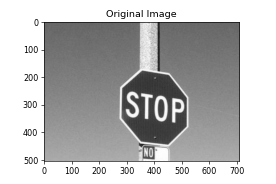

nrow= 504 and ncol= 708


In [880]:
import numpy as np #gerekli kütüphaneler import edildi.
import matplotlib.pyplot as plt
import cv2 as cv #open cv kütüphanesi cv olarak import edildi
%matplotlib notebook

original_image = cv.imread("kolay_dereceli(1).pgm",0) #giris görüntüsü okundu.
#out_image = cv.normalize( original_image.astype("float"), None, 0.0, 1.0, cv.NORM_MINMAX) #original_image float olarak
#normalize edildi. minimumum degeri=0.0, maksimum değeri 1.0
plt.figure()
plt.imshow(original_image,cmap = 'gray')
plt.title('Original Image')

sobelx = cv.Sobel(original_image,-1, 0, 1,ksize=3) #x yönündeki gradyanı
sobely = cv.Sobel(original_image,-1, 1, 0,ksize=3) #y yönündeki gradyanı
sobel = abs(sobelx)+abs(sobely) #toplam gradyan deger  bulundu
L=256

nrow, ncol=sobel.shape #sobel uygulanması sonucu elde edilen goruntunun satır ve sutun sayisi belirlendi
print("nrow=", nrow,"and ncol=", ncol)

In [881]:
r=0
sumofp=0
P=np.zeros(L) #Pr
H=np.zeros(L) #H[r]

for rows in range(nrow):
    for cols in range(ncol):
        r=int(sobel[rows,cols]) #original_image görüntüsünün piksel degerleri r'ye atandı
        H[r]= H[r] +1 #piksel degerlerinden kac adet olacaginin belirlenmesi saglandı
        
for i in range(L):
        P[i]=H[i]/(nrow*ncol) #Pr, tanimi geregi H[r]/nrow*ncols ve nrow=834, ncol=1114
        sumofp=sumofp+P[i] #Pr lerin toplamı 1'e esit olmali
print("Total Pr is", sumofp)

sigma_B=0 #sigmaB 0 a eşitlendi
sigma_B_arr=[] #sigmaB degerlerinin atanacagi ici bos array
#m1=0
#m2=0
#q1=0
#q2=0
for i in range(1,256): 
    q1=np.sum(P[:i]) #q1 tanımlandı
    q2=np.sum(P[i:]) #q2 tanımlandı
    m1=0 #µ1 0 a esitlendi
    m2=0 #µ2 0 a esitlendi
    for i1 in range(1, i+1):
        if(q1!= 0): #q1 0 iken herhangi bir sayının 0'a bolumu tanımsız olacagindan q1= 0 durumu cikarildi
             m1=m1+i1*(P[i1]/q1) #µ2 tanımlandı
    for i2 in range(i+1,256):
        if(q2 != 0): #q2 0 iken herhangi bir sayının 0'a bolumu tanımsız olacagindan q1= 0 durumu cikarildi
            m2=m2 + i2 * (P[i2]/q2) #µ2 tanımlandı
    sigma_B=q1 * q2 * ((m1-m2)*(m1-m2)) #sigmaB tanimlandi
    sigma_B_arr.append(sigma_B) #sigmaB degerleri sigma_B_arr arrayine atandı
T=np.argmax(sigma_B_arr) #sigma_B_arr arrayinin maximum degerini içeren index Tye atandı
print("The index which have maximum value is", T) #T cizdirildi

Total Pr is 0.9999999999999989
The index which have maximum value is 90


 Otsu eşikleme yöntemini kullanılarak T değerini belirlendi.

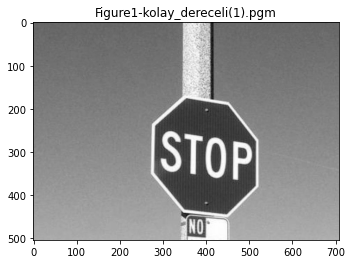

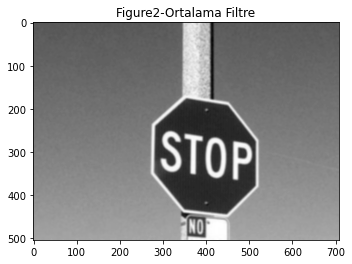

In [882]:
import numpy as np
import cv2
from matplotlib import pyplot as plt
from PIL import Image, ImageFilter
%matplotlib inline

original_image = cv.imread("kolay_dereceli(1).pgm", 0) #giris görüntüsü okundu.
size = 5 #kernalin x ve y eksenlerinin boyutu
filtered_image = cv2.blur(original_image,(size, size)) #mean filter giris görüntüsüne uygulandı.

plt.figure
plt.imshow(original_image,cmap = 'gray')
plt.title('Figure1-kolay_dereceli(1).pgm')
plt.show()

plt.figure
plt.imshow(filtered_image,cmap = 'gray')
plt.title('Figure2-Ortalama Filtre')
plt.show()

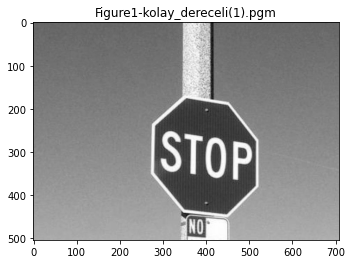

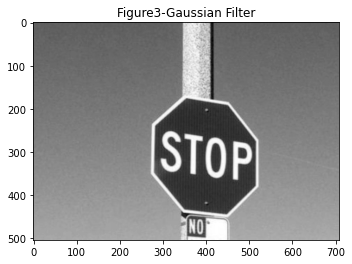

In [883]:
filtered_image_gauss = cv2.GaussianBlur(original_image, (3, 3),0) #Gaussian Blur giris görüntüsüne uygulandı.

plt.figure()
plt.imshow(original_image, cmap='gray')
plt.title('Figure1-kolay_dereceli(1).pgm')
plt.show()

plt.figure()
plt.imshow(filtered_image_gauss, cmap='gray')
plt.title('Figure3-Gaussian Filter')
plt.show()

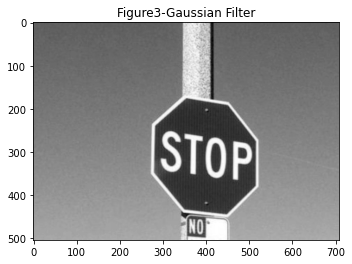

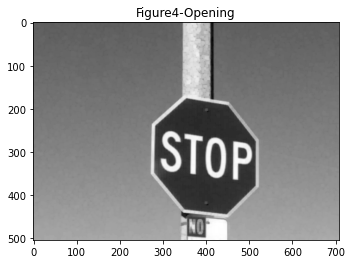

In [884]:
import numpy as np
import cv2
from matplotlib import pyplot as plt
from PIL import Image, ImageFilter
%matplotlib inline

original_image = cv.imread("kolay_dereceli(1).pgm",0)
kernel = np.ones((5,5), np.uint8) # yapı elemanı olan kernel tanımlandı.

opening = cv2.morphologyEx(filtered_image_gauss, cv2.MORPH_OPEN, kernel)
plt.figure
plt.imshow(opening,cmap = 'gray')
plt.title('Figure4-Opening')
plt.show()



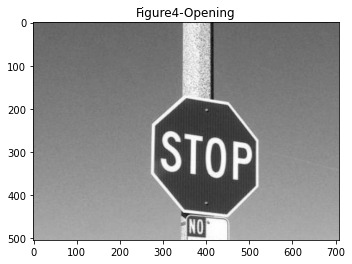

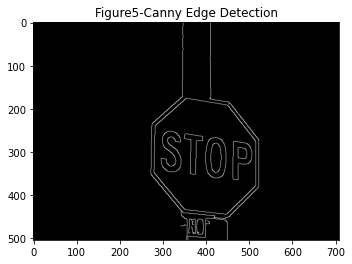

In [887]:
import cv2  #cv2 import edildi
import numpy as np
from matplotlib import pyplot as plt

edges = cv2.Canny(opening,T,300)#Canny Edge Detection giris görüntüsüne uygulandı.

plt.figure()
plt.imshow(original_image,cmap = 'gray')
plt.title('Figure4-Opening')
plt.show()

plt.figure()
plt.imshow(edges,cmap = 'gray')
plt.title('Figure5-Canny Edge Detection')
plt.show()

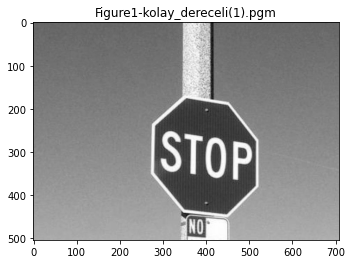

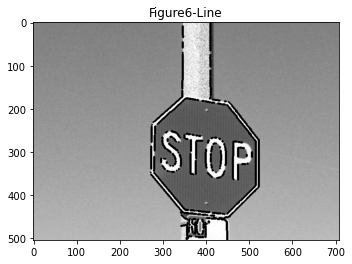

In [894]:
import cv2
import numpy as np
original_image = cv.imread("kolay_dereceli(1).pgm",0)
plt.figure
plt.imshow(original_image,cmap = 'gray')
plt.title('Figure1-kolay_dereceli(1).pgm')
plt.show()

lines = cv2.HoughLinesP(edges, 1, np.pi/180, 15)
#lines = cv2.HoughLinesP(edges,1,np.pi/180,100,minLineLength,maxLineGap)
#minLineLength:Minimum satır uzunluğu. Bundan daha kısa olan satır segmentleri reddedilir.
#maxLineGap - Tek satır olarak ele almak için satır segmentleri arasında izin verilen maksimum boşluk.
for line in lines:
    x1, y1, x2, y2 = line[0]
    cv2.line(original_image, (x1, y1), (x2, y2), 0, 3)
    #syntax: cv2.line(image, start_point, end_point, color, thickness)
    
plt.figure
plt.imshow(original_image,cmap = 'gray')
plt.title('Figure6-Line')
plt.show()


# Eğitim Görseli-2

<IPython.core.display.Javascript object>


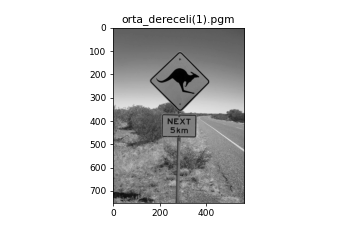

nrow= 752 and ncol= 564


In [1073]:
import numpy as np #gerekli kütüphaneler import edildi.
import matplotlib.pyplot as plt
import cv2 as cv #open cv kütüphanesi cv olarak import edildi
%matplotlib notebook

original_image = cv.imread("orta_dereceli(1).pgm",0) #giris görüntüsü okundu.
#out_image = cv.normalize( original_image.astype("float"), None, 0.0, 1.0, cv.NORM_MINMAX) #original_image float olarak
#normalize edildi. minimumum degeri=0.0, maksimum değeri 1.0
plt.figure()
plt.imshow(original_image,cmap = 'gray')
plt.title('orta_dereceli(1).pgm')

sobelx = cv.Sobel(original_image,-1, 0, 1,ksize=3) #x yönündeki gradyanı
sobely = cv.Sobel(original_image,-1, 1, 0,ksize=3) #y yönündeki gradyanı
sobel = abs(sobelx)+abs(sobely) #toplam gradyan deger  bulundu
L=256

nrow, ncol=sobel.shape #sobel uygulanması sonucu elde edilen goruntunun satır ve sutun sayisi belirlendi
print("nrow=", nrow,"and ncol=", ncol)

In [1074]:
r=0
sumofp=0
P=np.zeros(L) #Pr
H=np.zeros(L) #H[r]

for rows in range(nrow):
    for cols in range(ncol):
        r=int(sobel[rows,cols]) #original_image görüntüsünün piksel degerleri r'ye atandı
        H[r]= H[r] +1 #piksel degerlerinden kac adet olacaginin belirlenmesi saglandı
        
for i in range(L):
        P[i]=H[i]/(nrow*ncol) #Pr, tanimi geregi H[r]/nrow*ncols ve nrow=834, ncol=1114
        sumofp=sumofp+P[i] #Pr lerin toplamı 1'e esit olmali
print("Total Pr is", sumofp)

sigma_B=0 #sigmaB 0 a eşitlendi
sigma_B_arr=[] #sigmaB degerlerinin atanacagi ici bos array
#m1=0
#m2=0
#q1=0
#q2=0
for i in range(1,256): 
    q1=np.sum(P[:i]) #q1 tanımlandı
    q2=np.sum(P[i:]) #q2 tanımlandı
    m1=0 #µ1 0 a esitlendi
    m2=0 #µ2 0 a esitlendi
    for i1 in range(1, i+1):
        if(q1!= 0): #q1 0 iken herhangi bir sayının 0'a bolumu tanımsız olacagindan q1= 0 durumu cikarildi
             m1=m1+i1*(P[i1]/q1) #µ2 tanımlandı
    for i2 in range(i+1,256):
        if(q2 != 0): #q2 0 iken herhangi bir sayının 0'a bolumu tanımsız olacagindan q1= 0 durumu cikarildi
            m2=m2 + i2 * (P[i2]/q2) #µ2 tanımlandı
    sigma_B=q1 * q2 * ((m1-m2)*(m1-m2)) #sigmaB tanimlandi
    sigma_B_arr.append(sigma_B) #sigmaB degerleri sigma_B_arr arrayine atandı
T=np.argmax(sigma_B_arr) #sigma_B_arr arrayinin maximum degerini içeren index Tye atandı
print("The index which have maximum value is", T) #T cizdirildi

Total Pr is 1.0000000000000004
The index which have maximum value is 74


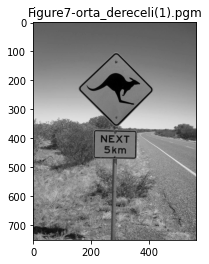

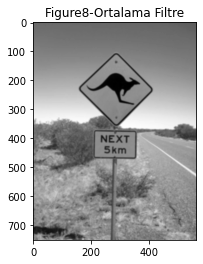

In [1075]:
import numpy as np
import cv2
from matplotlib import pyplot as plt
from PIL import Image, ImageFilter
%matplotlib inline

original_image = cv.imread("orta_dereceli(1).pgm", 0) #giris görüntüsü okundu.
size = 5 #kernalin x ve y eksenlerinin boyutu
filtered_image = cv2.blur(original_image,(size, size)) #mean filter giris görüntüsüne uygulandı.

plt.figure
plt.imshow(original_image,cmap = 'gray')
plt.title('Figure7-orta_dereceli(1).pgm')
plt.show()

plt.figure
plt.imshow(filtered_image,cmap = 'gray')
plt.title('Figure8-Ortalama Filtre')
plt.show()

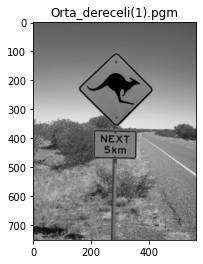

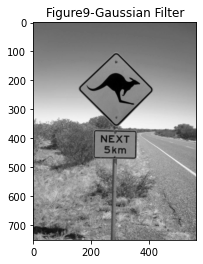

In [1076]:
filtered_image_gauss = cv2.GaussianBlur(original_image, (3, 3),0) #Gaussian Blur giris görüntüsüne uygulandı.

plt.figure()
plt.imshow(original_image, cmap='gray')
plt.title('Orta_dereceli(1).pgm')
plt.show()

plt.figure()
plt.imshow(filtered_image_gauss, cmap='gray')
plt.title('Figure9-Gaussian Filter')
plt.show()

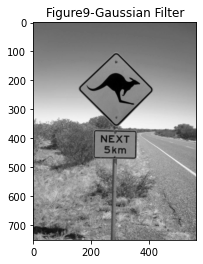

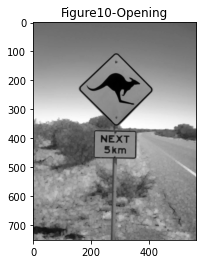

In [1077]:
import numpy as np
import cv2
from matplotlib import pyplot as plt
from PIL import Image, ImageFilter
%matplotlib inline

original_image = cv.imread("orta_dereceli(1).pgm",0)
kernel = np.ones((5,5), np.uint8) # yapı elemanı olan kernel tanımlandı.

opening = cv2.morphologyEx(original_image, cv2.MORPH_OPEN, kernel)

plt.figure
plt.imshow(filtered_image_gauss,cmap = 'gray')
plt.title('Figure9-Gaussian Filter')
plt.show()


opening = cv2.morphologyEx(filtered_image_gauss, cv2.MORPH_OPEN, kernel)
plt.figure
plt.imshow(opening,cmap = 'gray')
plt.title('Figure10-Opening')
plt.show()


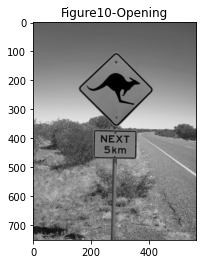

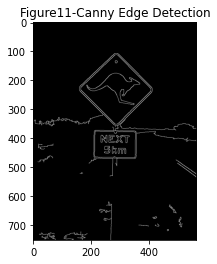

In [1078]:
import cv2  #cv2 import edildi
import numpy as np
from matplotlib import pyplot as plt

edges = cv2.Canny(opening,T,300) #Canny Edge Detection giris görüntüsüne uygulandı.

plt.figure()
plt.imshow(original_image,cmap = 'gray')
plt.title('Figure10-Opening')
plt.show()

plt.figure()
plt.imshow(edges,cmap = 'gray')
plt.title('Figure11-Canny Edge Detection')
plt.show()

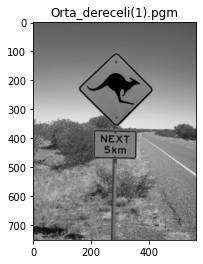

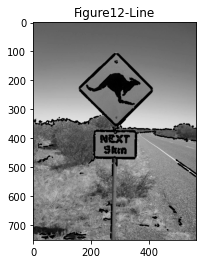

In [1079]:
import cv2
import numpy as np
original_image = cv.imread("orta_dereceli(1).pgm",0)
plt.figure
plt.imshow(original_image,cmap = 'gray')
plt.title('Orta_dereceli(1).pgm')
plt.show()

lines = cv2.HoughLinesP(edges, 1, np.pi/180, 15)
#lines = cv2.HoughLinesP(edges,1,np.pi/180,100,minLineLength,maxLineGap)
#minLineLength:Minimum satır uzunluğu. Bundan daha kısa olan satır segmentleri reddedilir.
#maxLineGap - Tek satır olarak ele almak için satır segmentleri arasında izin verilen maksimum boşluk.
for line in lines:
    x1, y1, x2, y2 = line[0]
    cv2.line(original_image, (x1, y1), (x2, y2), 0, 3)
    #syntax: cv2.line(image, start_point, end_point, color, thickness)
    
plt.figure
plt.imshow(original_image,cmap = 'gray')
plt.title('Figure12-Line')
plt.show()


# Eğitim Görseli-3

<IPython.core.display.Javascript object>


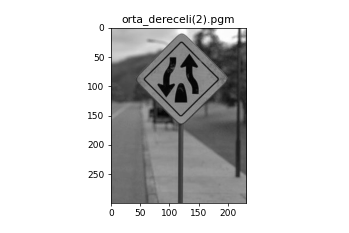

nrow= 300 and ncol= 232


In [1080]:
import numpy as np #gerekli kütüphaneler import edildi.
import matplotlib.pyplot as plt
import cv2 as cv #open cv kütüphanesi cv olarak import edildi
%matplotlib notebook

original_image = cv.imread("orta_dereceli(2).pgm",0) #giris görüntüsü okundu.
#out_image = cv.normalize( original_image.astype("float"), None, 0.0, 1.0, cv.NORM_MINMAX) #original_image float olarak
#normalize edildi. minimumum degeri=0.0, maksimum değeri 1.0
plt.figure()
plt.imshow(original_image,cmap = 'gray')
plt.title('orta_dereceli(2).pgm')

sobelx = cv.Sobel(original_image,-1, 0, 1,ksize=3) #x yönündeki gradyanı
sobely = cv.Sobel(original_image,-1, 1, 0,ksize=3) #y yönündeki gradyanı
sobel = abs(sobelx)+abs(sobely) #toplam gradyan deger  bulundu
L=256

nrow, ncol=sobel.shape #sobel uygulanması sonucu elde edilen goruntunun satır ve sutun sayisi belirlendi
print("nrow=", nrow,"and ncol=", ncol)

In [1081]:
r=0
sumofp=0
P=np.zeros(L) #Pr
H=np.zeros(L) #H[r]

for rows in range(nrow):
    for cols in range(ncol):
        r=int(sobel[rows,cols]) #original_image görüntüsünün piksel degerleri r'ye atandı
        H[r]= H[r] +1 #piksel degerlerinden kac adet olacaginin belirlenmesi saglandı
        
for i in range(L):
        P[i]=H[i]/(nrow*ncol) #Pr, tanimi geregi H[r]/nrow*ncols ve nrow=834, ncol=1114
        sumofp=sumofp+P[i] #Pr lerin toplamı 1'e esit olmali
print("Total Pr is", sumofp)

sigma_B=0 #sigmaB 0 a eşitlendi
sigma_B_arr=[] #sigmaB degerlerinin atanacagi ici bos array
#m1=0
#m2=0
#q1=0
#q2=0
for i in range(1,256): 
    q1=np.sum(P[:i]) #q1 tanımlandı
    q2=np.sum(P[i:]) #q2 tanımlandı
    m1=0 #µ1 0 a esitlendi
    m2=0 #µ2 0 a esitlendi
    for i1 in range(1, i+1):
        if(q1!= 0): #q1 0 iken herhangi bir sayının 0'a bolumu tanımsız olacagindan q1= 0 durumu cikarildi
             m1=m1+i1*(P[i1]/q1) #µ2 tanımlandı
    for i2 in range(i+1,256):
        if(q2 != 0): #q2 0 iken herhangi bir sayının 0'a bolumu tanımsız olacagindan q1= 0 durumu cikarildi
            m2=m2 + i2 * (P[i2]/q2) #µ2 tanımlandı
    sigma_B=q1 * q2 * ((m1-m2)*(m1-m2)) #sigmaB tanimlandi
    sigma_B_arr.append(sigma_B) #sigmaB degerleri sigma_B_arr arrayine atandı
T=np.argmax(sigma_B_arr) #sigma_B_arr arrayinin maximum degerini içeren index Tye atandı
print("The index which have maximum value is", T) #T cizdirildi

Total Pr is 0.9999999999999993
The index which have maximum value is 90


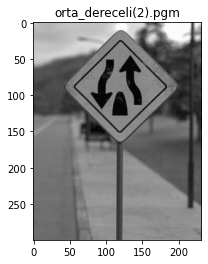

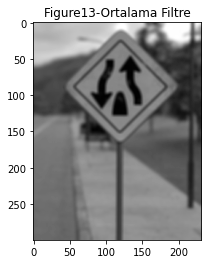

In [1082]:
import numpy as np
import cv2
from matplotlib import pyplot as plt
from PIL import Image, ImageFilter
%matplotlib inline

original_image = cv.imread("orta_dereceli(2).pgm", 0) #giris görüntüsü okundu.
size = 5 #kernalin x ve y eksenlerinin boyutu
filtered_image = cv2.blur(original_image,(size, size)) #mean filter giris görüntüsüne uygulandı.

plt.figure
plt.imshow(original_image,cmap = 'gray')
plt.title('orta_dereceli(2).pgm')
plt.show()

plt.figure
plt.imshow(filtered_image,cmap = 'gray')
plt.title('Figure13-Ortalama Filtre')
plt.show()

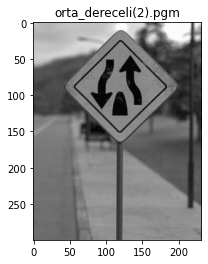

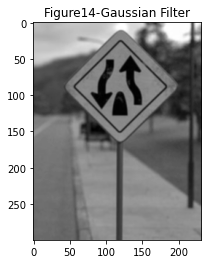

In [1083]:
filtered_image_gauss = cv2.GaussianBlur(original_image, (3, 3),0) #Gaussian Blur giris görüntüsüne uygulandı.

plt.figure()
plt.imshow(original_image, cmap='gray')
plt.title('orta_dereceli(2).pgm')
plt.show()

plt.figure()
plt.imshow(filtered_image_gauss, cmap='gray')
plt.title('Figure14-Gaussian Filter')
plt.show()

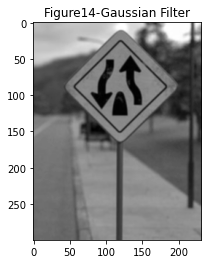

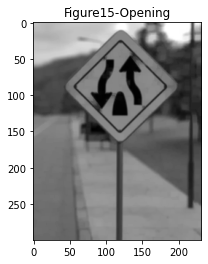

In [1084]:
import numpy as np
import cv2
from matplotlib import pyplot as plt
from PIL import Image, ImageFilter
%matplotlib inline

original_image = cv.imread("orta_dereceli(2).pgm",0)
kernel = np.ones((5,5), np.uint8) # yapı elemanı olan kernel tanımlandı.

opening = cv2.morphologyEx(original_image, cv2.MORPH_OPEN, kernel)

plt.figure
plt.imshow(filtered_image_gauss,cmap = 'gray')
plt.title('Figure14-Gaussian Filter')
plt.show()


opening = cv2.morphologyEx(filtered_image_gauss, cv2.MORPH_OPEN, kernel)
plt.figure
plt.imshow(opening,cmap = 'gray')
plt.title('Figure15-Opening')
plt.show()


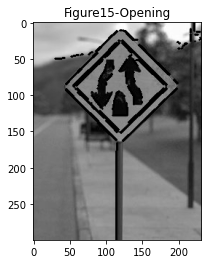

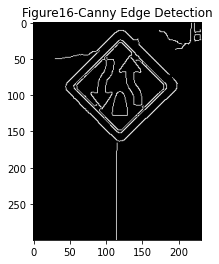

In [1088]:
import cv2  #cv2 import edildi
import numpy as np
from matplotlib import pyplot as plt

edges = cv2.Canny(opening,T,300) #Canny Edge Detection giris görüntüsüne uygulandı.

plt.figure()
plt.imshow(original_image,cmap = 'gray')
plt.title('Figure15-Opening')
plt.show()

plt.figure()
plt.imshow(edges,cmap = 'gray')
plt.title('Figure16-Canny Edge Detection')
plt.show()

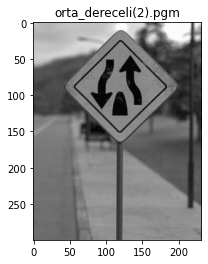

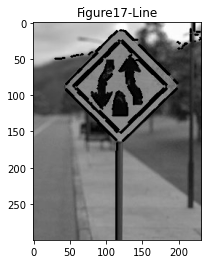

In [1089]:
import cv2
import numpy as np
original_image = cv.imread("orta_dereceli(2).pgm",0)
plt.figure
plt.imshow(original_image,cmap = 'gray')
plt.title('orta_dereceli(2).pgm')
plt.show()

lines = cv2.HoughLinesP(edges, 1, np.pi/180, 15)
#lines = cv2.HoughLinesP(edges,1,np.pi/180,100,minLineLength,maxLineGap)
#minLineLength:Minimum satır uzunluğu. Bundan daha kısa olan satır segmentleri reddedilir.
#maxLineGap - Tek satır olarak ele almak için satır segmentleri arasında izin verilen maksimum boşluk.
for line in lines:
    x1, y1, x2, y2 = line[0]
    cv2.line(original_image, (x1, y1), (x2, y2), 0, 2)
    #syntax: cv2.line(image, start_point, end_point, color, thickness)
    
plt.figure
plt.imshow(original_image,cmap = 'gray')
plt.title('Figure17-Line')
plt.show()


# Eğitim Görseli-4


<IPython.core.display.Javascript object>


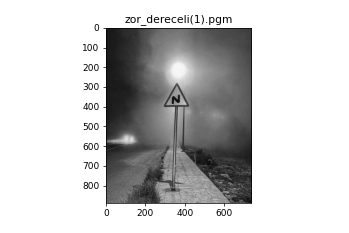

nrow= 888 and ncol= 736


In [1090]:
import numpy as np #gerekli kütüphaneler import edildi.
import matplotlib.pyplot as plt
import cv2 as cv #open cv kütüphanesi cv olarak import edildi
%matplotlib notebook

original_image = cv.imread("zor_dereceli(1).pgm",0) #giris görüntüsü okundu.
#out_image = cv.normalize( original_image.astype("float"), None, 0.0, 1.0, cv.NORM_MINMAX) #original_image float olarak
#normalize edildi. minimumum degeri=0.0, maksimum değeri 1.0
plt.figure()
plt.imshow(original_image,cmap = 'gray')
plt.title('zor_dereceli(1).pgm')

sobelx = cv.Sobel(original_image,-1, 0, 1,ksize=3) #x yönündeki gradyanı
sobely = cv.Sobel(original_image,-1, 1, 0,ksize=3) #y yönündeki gradyanı
sobel = abs(sobelx)+abs(sobely) #toplam gradyan deger  bulundu
L=256

nrow, ncol=sobel.shape #sobel uygulanması sonucu elde edilen goruntunun satır ve sutun sayisi belirlendi
print("nrow=", nrow,"and ncol=", ncol)

In [1091]:
r=0
sumofp=0
P=np.zeros(L) #Pr
H=np.zeros(L) #H[r]

for rows in range(nrow):
    for cols in range(ncol):
        r=int(sobel[rows,cols]) #original_image görüntüsünün piksel degerleri r'ye atandı
        H[r]= H[r] +1 #piksel degerlerinden kac adet olacaginin belirlenmesi saglandı
        
for i in range(L):
        P[i]=H[i]/(nrow*ncol) #Pr, tanimi geregi H[r]/nrow*ncols ve nrow=834, ncol=1114
        sumofp=sumofp+P[i] #Pr lerin toplamı 1'e esit olmali
print("Total Pr is", sumofp)

sigma_B=0 #sigmaB 0 a eşitlendi
sigma_B_arr=[] #sigmaB degerlerinin atanacagi ici bos array
#m1=0
#m2=0
#q1=0
#q2=0
for i in range(1,256): 
    q1=np.sum(P[:i]) #q1 tanımlandı
    q2=np.sum(P[i:]) #q2 tanımlandı
    m1=0 #µ1 0 a esitlendi
    m2=0 #µ2 0 a esitlendi
    for i1 in range(1, i+1):
        if(q1!= 0): #q1 0 iken herhangi bir sayının 0'a bolumu tanımsız olacagindan q1= 0 durumu cikarildi
             m1=m1+i1*(P[i1]/q1) #µ2 tanımlandı
    for i2 in range(i+1,256):
        if(q2 != 0): #q2 0 iken herhangi bir sayının 0'a bolumu tanımsız olacagindan q1= 0 durumu cikarildi
            m2=m2 + i2 * (P[i2]/q2) #µ2 tanımlandı
    sigma_B=q1 * q2 * ((m1-m2)*(m1-m2)) #sigmaB tanimlandi
    sigma_B_arr.append(sigma_B) #sigmaB degerleri sigma_B_arr arrayine atandı
T=np.argmax(sigma_B_arr) #sigma_B_arr arrayinin maximum degerini içeren index Tye atandı
print("The index which have maximum value is", T) #T cizdirildi

Total Pr is 1.0000000000000004
The index which have maximum value is 74


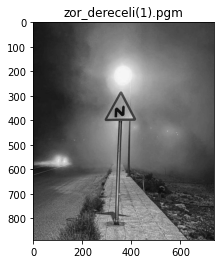

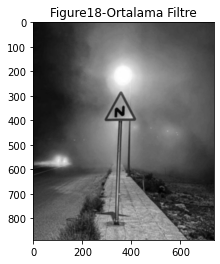

In [1092]:
import numpy as np
import cv2
from matplotlib import pyplot as plt
from PIL import Image, ImageFilter
%matplotlib inline

original_image = cv.imread("zor_dereceli(1).pgm", 0) #giris görüntüsü okundu.
size = 5 #kernalin x ve y eksenlerinin boyutu
filtered_image = cv2.blur(original_image,(size, size)) #mean filter giris görüntüsüne uygulandı.

plt.figure
plt.imshow(original_image,cmap = 'gray')
plt.title('zor_dereceli(1).pgm')
plt.show()

plt.figure
plt.imshow(filtered_image,cmap = 'gray')
plt.title('Figure18-Ortalama Filtre')
plt.show()

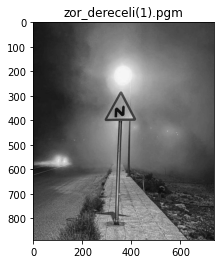

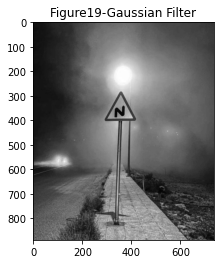

In [1093]:
filtered_image_gauss = cv2.GaussianBlur(original_image, (3, 3),0) #Gaussian Blur giris görüntüsüne uygulandı.

plt.figure()
plt.imshow(original_image, cmap='gray')
plt.title('zor_dereceli(1).pgm')
plt.show()

plt.figure()
plt.imshow(filtered_image_gauss, cmap='gray')
plt.title('Figure19-Gaussian Filter')
plt.show()

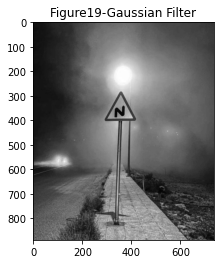

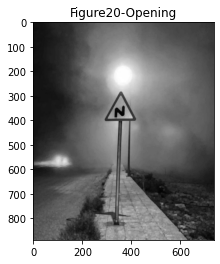

In [1094]:
import numpy as np
import cv2
from matplotlib import pyplot as plt
from PIL import Image, ImageFilter
%matplotlib inline

original_image = cv.imread("zor_dereceli(1).pgm",0)
kernel = np.ones((5,5), np.uint8) # yapı elemanı olan kernel tanımlandı.

opening = cv2.morphologyEx(original_image, cv2.MORPH_OPEN, kernel)

plt.figure
plt.imshow(filtered_image_gauss,cmap = 'gray')
plt.title('Figure19-Gaussian Filter')
plt.show()


opening = cv2.morphologyEx(filtered_image_gauss, cv2.MORPH_OPEN, kernel)
plt.figure
plt.imshow(opening,cmap = 'gray')
plt.title('Figure20-Opening')
plt.show()


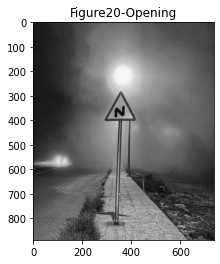

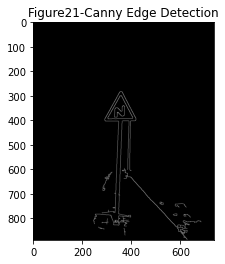

In [1095]:
import cv2  #cv2 import edildi
import numpy as np
from matplotlib import pyplot as plt

edges = cv2.Canny(opening,T,300) #Canny Edge Detection giris görüntüsüne uygulandı.

plt.figure()
plt.imshow(original_image,cmap = 'gray')
plt.title('Figure20-Opening')
plt.show()

plt.figure()
plt.imshow(edges,cmap = 'gray')
plt.title('Figure21-Canny Edge Detection')
plt.show()

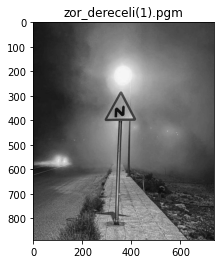

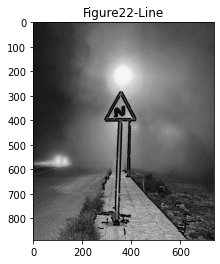

In [1096]:
import cv2
import numpy as np
original_image = cv.imread("zor_dereceli(1).pgm",0)
plt.figure
plt.imshow(original_image,cmap = 'gray')
plt.title('zor_dereceli(1).pgm')
plt.show()

lines = cv2.HoughLinesP(edges, 1, np.pi/180, 15)
#lines = cv2.HoughLinesP(edges,1,np.pi/180,100,minLineLength,maxLineGap)
#minLineLength:Minimum satır uzunluğu. Bundan daha kısa olan satır segmentleri reddedilir.
#maxLineGap - Tek satır olarak ele almak için satır segmentleri arasında izin verilen maksimum boşluk.
for line in lines:
    x1, y1, x2, y2 = line[0]
    cv2.line(original_image, (x1, y1), (x2, y2), 0, 3)
    #syntax: cv2.line(image, start_point, end_point, color, thickness)
    
plt.figure
plt.imshow(original_image,cmap = 'gray')
plt.title('Figure22-Line')
plt.show()


# Test Görseli-1

In [1104]:
import numpy as np #gerekli kütüphaneler import edildi.
import matplotlib.pyplot as plt
import cv2 as cv #open cv kütüphanesi cv olarak import edildi
import numpy as np
import cv2
from PIL import Image, ImageFilter
%matplotlib notebook

original_image = cv.imread("kolay_dereceli_test(1).pgm",0) #giris görüntüsü okundu.
#out_image = cv.normalize( original_image.astype("float"), None, 0.0, 1.0, cv.NORM_MINMAX) #original_image float olarak
#normalize edildi. minimumum degeri=0.0, maksimum değeri 1.0
plt.figure()
plt.imshow(original_image,cmap = 'gray')
plt.title('kolay_dereceli_test(1).pgm')

sobelx = cv.Sobel(original_image,-1, 0, 1,ksize=3) #x yönündeki gradyanı
sobely = cv.Sobel(original_image,-1, 1, 0,ksize=3) #y yönündeki gradyanı
sobel = abs(sobelx)+abs(sobely) #toplam gradyan deger  bulundu
L=256

nrow, ncol=sobel.shape #sobel uygulanması sonucu elde edilen goruntunun satır ve sutun sayisi belirlendi
print("nrow=", nrow,"and ncol=", ncol)

r=0
sumofp=0
P=np.zeros(L) #Pr
H=np.zeros(L) #H[r]

for rows in range(nrow):
    for cols in range(ncol):
        r=int(sobel[rows,cols]) #original_image görüntüsünün piksel degerleri r'ye atandı
        H[r]= H[r] +1 #piksel degerlerinden kac adet olacaginin belirlenmesi saglandı
        
for i in range(L):
        P[i]=H[i]/(nrow*ncol) #Pr, tanimi geregi H[r]/nrow*ncols ve nrow=834, ncol=1114
        sumofp=sumofp+P[i] #Pr lerin toplamı 1'e esit olmali
print("Total Pr is", sumofp)


<IPython.core.display.Javascript object>

nrow= 1002 and ncol= 564
Total Pr is 0.9999999999999984


In [1105]:
sigma_B=0 #sigmaB 0 a eşitlendi
sigma_B_arr=[] #sigmaB degerlerinin atanacagi ici bos array
#m1=0
#m2=0
#q1=0
#q2=0
for i in range(1,256): 
    q1=np.sum(P[:i]) #q1 tanımlandı
    q2=np.sum(P[i:]) #q2 tanımlandı
    m1=0 #µ1 0 a esitlendi
    m2=0 #µ2 0 a esitlendi
    for i1 in range(1, i+1):
        if(q1!= 0): #q1 0 iken herhangi bir sayının 0'a bolumu tanımsız olacagindan q1= 0 durumu cikarildi
             m1=m1+i1*(P[i1]/q1) #µ2 tanımlandı
    for i2 in range(i+1,256):
        if(q2 != 0): #q2 0 iken herhangi bir sayının 0'a bolumu tanımsız olacagindan q1= 0 durumu cikarildi
            m2=m2 + i2 * (P[i2]/q2) #µ2 tanımlandı
    sigma_B=q1 * q2 * ((m1-m2)*(m1-m2)) #sigmaB tanimlandi
    sigma_B_arr.append(sigma_B) #sigmaB degerleri sigma_B_arr arrayine atandı
T=np.argmax(sigma_B_arr) #sigma_B_arr arrayinin maximum degerini içeren index Tye atandı
print("The index which have maximum value is", T) #T cizdirildi

The index which have maximum value is 116


In [1106]:
filtered_image_gauss = cv2.GaussianBlur(original_image, (3, 3),0) #Gaussian Blur giris görüntüsüne uygulandı.
plt.figure()
plt.imshow(filtered_image_gauss, cmap='gray')
plt.title('Figure23-Gaussian Filter')
plt.show()

<IPython.core.display.Javascript object>

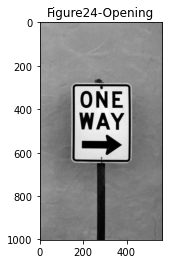

In [1107]:
import numpy as np
import cv2
from matplotlib import pyplot as plt
from PIL import Image, ImageFilter
%matplotlib inline

original_image = cv.imread("zor_dereceli(1).pgm",0)
kernel = np.ones((5,5), np.uint8) # yapı elemanı olan kernel tanımlandı.

opening = cv2.morphologyEx(filtered_image_gauss, cv2.MORPH_OPEN, kernel)
plt.figure
plt.imshow(opening,cmap = 'gray')
plt.title('Figure24-Opening')
plt.show()


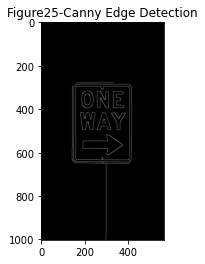

In [1108]:
edges = cv2.Canny(opening,T,300) #Canny Edge Detection giris görüntüsüne uygulandı.

plt.figure()
plt.imshow(edges,cmap = 'gray')
plt.title('Figure25-Canny Edge Detection')
plt.show()

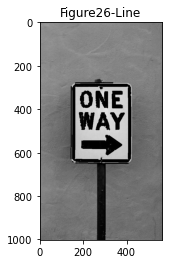

In [1112]:
original_image = cv.imread("kolay_dereceli_test(1).pgm",0)
lines = cv2.HoughLinesP(edges, 1, np.pi/180, 15)
#lines = cv2.HoughLinesP(edges,1,np.pi/180,100,minLineLength,maxLineGap)
#minLineLength:Minimum satır uzunluğu. Bundan daha kısa olan satır segmentleri reddedilir.
#maxLineGap - Tek satır olarak ele almak için satır segmentleri arasında izin verilen maksimum boşluk.
for line in lines:
    x1, y1, x2, y2 = line[0]
    cv2.line(original_image, (x1, y1), (x2, y2), 0, 3)
    #syntax: cv2.line(image, start_point, end_point, color, thickness)
    
plt.figure
plt.imshow(original_image,cmap = 'gray')
plt.title('Figure26-Line')
plt.show()


# Test Görseli-2

<IPython.core.display.Javascript object>


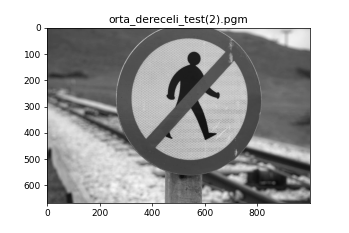

nrow= 667 and ncol= 1000
Total Pr is 1.0000000000000002


In [1113]:
import numpy as np #gerekli kütüphaneler import edildi.
import matplotlib.pyplot as plt
import cv2 as cv #open cv kütüphanesi cv olarak import edildi
import numpy as np
import cv2
from PIL import Image, ImageFilter
%matplotlib notebook

original_image = cv.imread("orta_dereceli_test(2).pgm",0) #giris görüntüsü okundu.
#out_image = cv.normalize( original_image.astype("float"), None, 0.0, 1.0, cv.NORM_MINMAX) #original_image float olarak
#normalize edildi. minimumum degeri=0.0, maksimum değeri 1.0
plt.figure()
plt.imshow(original_image,cmap = 'gray')
plt.title('orta_dereceli_test(2).pgm')

sobelx = cv.Sobel(original_image,-1, 0, 1,ksize=3) #x yönündeki gradyanı
sobely = cv.Sobel(original_image,-1, 1, 0,ksize=3) #y yönündeki gradyanı
sobel = abs(sobelx)+abs(sobely) #toplam gradyan deger  bulundu
L=256

nrow, ncol=sobel.shape #sobel uygulanması sonucu elde edilen goruntunun satır ve sutun sayisi belirlendi
print("nrow=", nrow,"and ncol=", ncol)

r=0
sumofp=0
P=np.zeros(L) #Pr
H=np.zeros(L) #H[r]

for rows in range(nrow):
    for cols in range(ncol):
        r=int(sobel[rows,cols]) #original_image görüntüsünün piksel degerleri r'ye atandı
        H[r]= H[r] +1 #piksel degerlerinden kac adet olacaginin belirlenmesi saglandı
        
for i in range(L):
        P[i]=H[i]/(nrow*ncol) #Pr, tanimi geregi H[r]/nrow*ncols ve nrow=834, ncol=1114
        sumofp=sumofp+P[i] #Pr lerin toplamı 1'e esit olmali
print("Total Pr is", sumofp)

In [1114]:

sigma_B=0 #sigmaB 0 a eşitlendi
sigma_B_arr=[] #sigmaB degerlerinin atanacagi ici bos array
#m1=0
#m2=0
#q1=0
#q2=0
for i in range(1,256): 
    q1=np.sum(P[:i]) #q1 tanımlandı
    q2=np.sum(P[i:]) #q2 tanımlandı
    m1=0 #µ1 0 a esitlendi
    m2=0 #µ2 0 a esitlendi
    for i1 in range(1, i+1):
        if(q1!= 0): #q1 0 iken herhangi bir sayının 0'a bolumu tanımsız olacagindan q1= 0 durumu cikarildi
             m1=m1+i1*(P[i1]/q1) #µ2 tanımlandı
    for i2 in range(i+1,256):
        if(q2 != 0): #q2 0 iken herhangi bir sayının 0'a bolumu tanımsız olacagindan q1= 0 durumu cikarildi
            m2=m2 + i2 * (P[i2]/q2) #µ2 tanımlandı
    sigma_B=q1 * q2 * ((m1-m2)*(m1-m2)) #sigmaB tanimlandi
    sigma_B_arr.append(sigma_B) #sigmaB degerleri sigma_B_arr arrayine atandı
T=np.argmax(sigma_B_arr) #sigma_B_arr arrayinin maximum degerini içeren index Tye atandı
print("The index which have maximum value is", T) #T cizdirildi


The index which have maximum value is 56


<IPython.core.display.Javascript object>


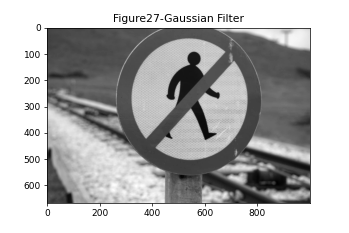

In [1116]:
filtered_image_gauss = cv2.GaussianBlur(original_image, (3, 3),0) #Gaussian Blur giris görüntüsüne uygulandı.
plt.figure()
plt.imshow(filtered_image_gauss, cmap='gray')
plt.title('Figure27-Gaussian Filter')
plt.show()

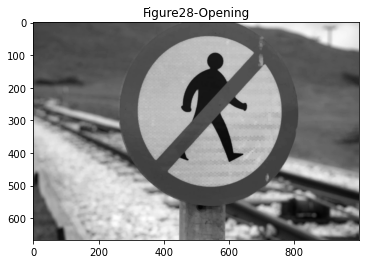

In [1117]:
import numpy as np
import cv2
from matplotlib import pyplot as plt
from PIL import Image, ImageFilter
%matplotlib inline

original_image = cv.imread("orta_dereceli_test(2)pgm",0)
kernel = np.ones((5,5), np.uint8) # yapı elemanı olan kernel tanımlandı.

opening = cv2.morphologyEx(filtered_image_gauss, cv2.MORPH_OPEN, kernel)
plt.figure
plt.imshow(opening,cmap = 'gray')
plt.title('Figure28-Opening')
plt.show()


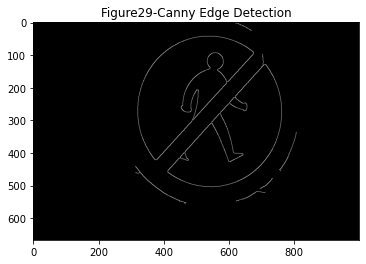

In [1131]:
edges = cv2.Canny(opening,T,300) #Canny Edge Detection giris görüntüsüne uygulandı.

plt.figure()
plt.imshow(edges,cmap = 'gray')
plt.title('Figure29-Canny Edge Detection')
plt.show()

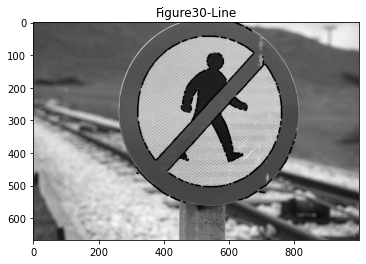

In [1132]:
original_image = cv.imread("orta_dereceli_test(2).pgm",0) #giris görüntüsü okundu.

lines = cv2.HoughLinesP(edges, 1, np.pi/180, 15)
#lines = cv2.HoughLinesP(edges,1,np.pi/180,100,minLineLength,maxLineGap)
#minLineLength:Minimum satır uzunluğu. Bundan daha kısa olan satır segmentleri reddedilir.
#maxLineGap - Tek satır olarak ele almak için satır segmentleri arasında izin verilen maksimum boşluk.
for line in lines:
    x1, y1, x2, y2 = line[0]
    cv2.line(original_image, (x1, y1), (x2, y2), 0, 3)
    #syntax: cv2.line(image, start_point, end_point, color, thickness)
    
plt.figure
plt.imshow(original_image,cmap = 'gray')
plt.title('Figure30-Line')
plt.show()


# Test Görseli-3

<IPython.core.display.Javascript object>


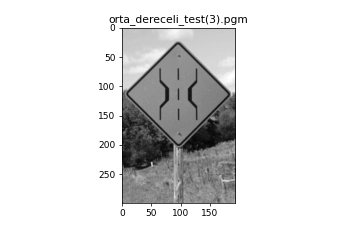

nrow= 300 and ncol= 194
Total Pr is 0.999999999999999


In [1136]:
import numpy as np #gerekli kütüphaneler import edildi.
import matplotlib.pyplot as plt
import cv2 as cv #open cv kütüphanesi cv olarak import edildi
import numpy as np
import cv2
from PIL import Image, ImageFilter
%matplotlib notebook

original_image = cv.imread("orta_dereceli_test(3).pgm",0) #giris görüntüsü okundu.
#out_image = cv.normalize( original_image.astype("float"), None, 0.0, 1.0, cv.NORM_MINMAX) #original_image float olarak
#normalize edildi. minimumum degeri=0.0, maksimum değeri 1.0
plt.figure()
plt.imshow(original_image,cmap = 'gray')
plt.title('orta_dereceli_test(3).pgm')

sobelx = cv.Sobel(original_image,-1, 0, 1,ksize=3) #x yönündeki gradyanı
sobely = cv.Sobel(original_image,-1, 1, 0,ksize=3) #y yönündeki gradyanı
sobel = abs(sobelx)+abs(sobely) #toplam gradyan deger  bulundu
L=256

nrow, ncol=sobel.shape #sobel uygulanması sonucu elde edilen goruntunun satır ve sutun sayisi belirlendi
print("nrow=", nrow,"and ncol=", ncol)

r=0
sumofp=0
P=np.zeros(L) #Pr
H=np.zeros(L) #H[r]

for rows in range(nrow):
    for cols in range(ncol):
        r=int(sobel[rows,cols]) #original_image görüntüsünün piksel degerleri r'ye atandı
        H[r]= H[r] +1 #piksel degerlerinden kac adet olacaginin belirlenmesi saglandı
        
for i in range(L):
        P[i]=H[i]/(nrow*ncol) #Pr, tanimi geregi H[r]/nrow*ncols ve nrow=834, ncol=1114
        sumofp=sumofp+P[i] #Pr lerin toplamı 1'e esit olmali
print("Total Pr is", sumofp)

In [1137]:
sigma_B=0 #sigmaB 0 a eşitlendi
sigma_B_arr=[] #sigmaB degerlerinin atanacagi ici bos array
#m1=0
#m2=0
#q1=0
#q2=0
for i in range(1,256): 
    q1=np.sum(P[:i]) #q1 tanımlandı
    q2=np.sum(P[i:]) #q2 tanımlandı
    m1=0 #µ1 0 a esitlendi
    m2=0 #µ2 0 a esitlendi
    for i1 in range(1, i+1):
        if(q1!= 0): #q1 0 iken herhangi bir sayının 0'a bolumu tanımsız olacagindan q1= 0 durumu cikarildi
             m1=m1+i1*(P[i1]/q1) #µ2 tanımlandı
    for i2 in range(i+1,256):
        if(q2 != 0): #q2 0 iken herhangi bir sayının 0'a bolumu tanımsız olacagindan q1= 0 durumu cikarildi
            m2=m2 + i2 * (P[i2]/q2) #µ2 tanımlandı
    sigma_B=q1 * q2 * ((m1-m2)*(m1-m2)) #sigmaB tanimlandi
    sigma_B_arr.append(sigma_B) #sigmaB degerleri sigma_B_arr arrayine atandı
T=np.argmax(sigma_B_arr) #sigma_B_arr arrayinin maximum degerini içeren index Tye atandı
print("The index which have maximum value is", T) #T cizdirildi

The index which have maximum value is 90


In [1138]:
filtered_image_gauss = cv2.GaussianBlur(original_image, (3, 3),0) #Gaussian Blur giris görüntüsüne uygulandı.
plt.figure()
plt.imshow(filtered_image_gauss, cmap='gray')
plt.title('Figure31-Gaussian Filter')
plt.show()

<IPython.core.display.Javascript object>

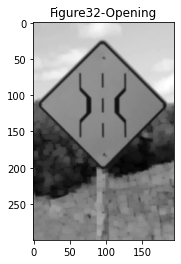

In [1139]:
import numpy as np
import cv2
from matplotlib import pyplot as plt
from PIL import Image, ImageFilter
%matplotlib inline

original_image = cv.imread("orta_dereceli_test(3).pgm",0)
kernel = np.ones((5,5), np.uint8) # yapı elemanı olan kernel tanımlandı.

opening = cv2.morphologyEx(filtered_image_gauss, cv2.MORPH_OPEN, kernel)
plt.figure
plt.imshow(opening,cmap = 'gray')
plt.title('Figure32-Opening')
plt.show()

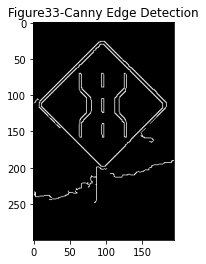

In [1140]:
edges = cv2.Canny(opening,T,300) #Canny Edge Detection giris görüntüsüne uygulandı.

plt.figure()
plt.imshow(edges,cmap = 'gray')
plt.title('Figure33-Canny Edge Detection')
plt.show()

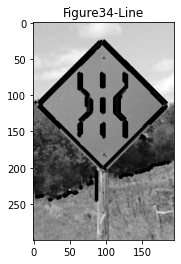

In [1142]:
original_image = cv.imread("orta_dereceli_test(3).pgm",0)
lines = cv2.HoughLinesP(edges, 1, np.pi/180, 15)
#lines = cv2.HoughLinesP(edges,1,np.pi/180,100,minLineLength,maxLineGap)
#minLineLength:Minimum satır uzunluğu. Bundan daha kısa olan satır segmentleri reddedilir.
#maxLineGap - Tek satır olarak ele almak için satır segmentleri arasında izin verilen maksimum boşluk.
for line in lines:
    x1, y1, x2, y2 = line[0]
    cv2.line(original_image, (x1, y1), (x2, y2), 0, 3)
    #syntax: cv2.line(image, start_point, end_point, color, thickness)
    
plt.figure
plt.imshow(original_image,cmap = 'gray')
plt.title('Figure34-Line')
plt.show()

# Test Görseli-4

<IPython.core.display.Javascript object>


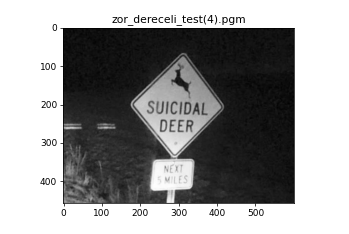

nrow= 457 and ncol= 600
Total Pr is 0.9999999999999994


In [1143]:
import numpy as np #gerekli kütüphaneler import edildi.
import matplotlib.pyplot as plt
import cv2 as cv #open cv kütüphanesi cv olarak import edildi
import numpy as np
import cv2
from PIL import Image, ImageFilter
%matplotlib notebook

original_image = cv.imread("zor_dereceli_test(4).pgm",0) #giris görüntüsü okundu.
#out_image = cv.normalize( original_image.astype("float"), None, 0.0, 1.0, cv.NORM_MINMAX) #original_image float olarak
#normalize edildi. minimumum degeri=0.0, maksimum değeri 1.0
plt.figure()
plt.imshow(original_image,cmap = 'gray')
plt.title('zor_dereceli_test(4).pgm')

sobelx = cv.Sobel(original_image,-1, 0, 1,ksize=3) #x yönündeki gradyanı
sobely = cv.Sobel(original_image,-1, 1, 0,ksize=3) #y yönündeki gradyanı
sobel = abs(sobelx)+abs(sobely) #toplam gradyan deger  bulundu
L=256

nrow, ncol=sobel.shape #sobel uygulanması sonucu elde edilen goruntunun satır ve sutun sayisi belirlendi
print("nrow=", nrow,"and ncol=", ncol)

r=0
sumofp=0
P=np.zeros(L) #Pr
H=np.zeros(L) #H[r]

for rows in range(nrow):
    for cols in range(ncol):
        r=int(sobel[rows,cols]) #original_image görüntüsünün piksel degerleri r'ye atandı
        H[r]= H[r] +1 #piksel degerlerinden kac adet olacaginin belirlenmesi saglandı
        
for i in range(L):
        P[i]=H[i]/(nrow*ncol) #Pr, tanimi geregi H[r]/nrow*ncols ve nrow=834, ncol=1114
        sumofp=sumofp+P[i] #Pr lerin toplamı 1'e esit olmali
print("Total Pr is", sumofp)

In [1144]:
sigma_B=0 #sigmaB 0 a eşitlendi
sigma_B_arr=[] #sigmaB degerlerinin atanacagi ici bos array
#m1=0
#m2=0
#q1=0
#q2=0
for i in range(1,256): 
    q1=np.sum(P[:i]) #q1 tanımlandı
    q2=np.sum(P[i:]) #q2 tanımlandı
    m1=0 #µ1 0 a esitlendi
    m2=0 #µ2 0 a esitlendi
    for i1 in range(1, i+1):
        if(q1!= 0): #q1 0 iken herhangi bir sayının 0'a bolumu tanımsız olacagindan q1= 0 durumu cikarildi
             m1=m1+i1*(P[i1]/q1) #µ2 tanımlandı
    for i2 in range(i+1,256):
        if(q2 != 0): #q2 0 iken herhangi bir sayının 0'a bolumu tanımsız olacagindan q1= 0 durumu cikarildi
            m2=m2 + i2 * (P[i2]/q2) #µ2 tanımlandı
    sigma_B=q1 * q2 * ((m1-m2)*(m1-m2)) #sigmaB tanimlandi
    sigma_B_arr.append(sigma_B) #sigmaB degerleri sigma_B_arr arrayine atandı
T=np.argmax(sigma_B_arr) #sigma_B_arr arrayinin maximum degerini içeren index Tye atandı
print("The index which have maximum value is", T) #T cizdirildi

The index which have maximum value is 86


<IPython.core.display.Javascript object>


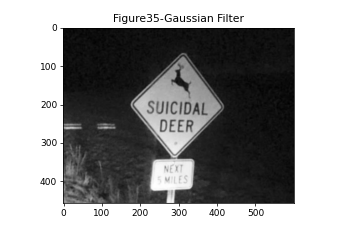

In [1145]:
filtered_image_gauss = cv2.GaussianBlur(original_image, (3, 3),0) #Gaussian Blur giris görüntüsüne uygulandı.
plt.figure()
plt.imshow(filtered_image_gauss, cmap='gray')
plt.title('Figure35-Gaussian Filter')
plt.show()

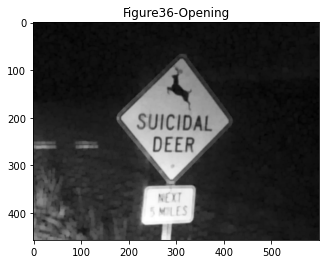

In [1147]:
import numpy as np
import cv2
from matplotlib import pyplot as plt
from PIL import Image, ImageFilter
%matplotlib inline

original_image = cv.imread("zor_dereceli_test(1,4).pgm",0)
kernel = np.ones((5,5), np.uint8) # yapı elemanı olan kernel tanımlandı.

opening = cv2.morphologyEx(filtered_image_gauss, cv2.MORPH_OPEN, kernel)
plt.figure
plt.imshow(opening,cmap = 'gray')
plt.title('Figure36-Opening')
plt.show()

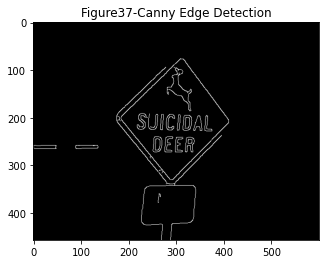

In [1148]:
edges = cv2.Canny(opening,T,300) #Canny Edge Detection giris görüntüsüne uygulandı.

plt.figure()
plt.imshow(edges,cmap = 'gray')
plt.title('Figure37-Canny Edge Detection')
plt.show()

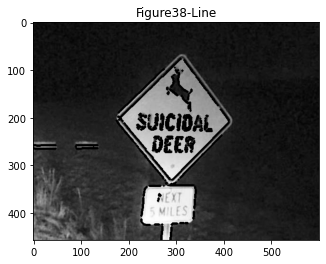

In [1150]:
original_image = cv.imread("zor_dereceli_test(4).pgm",0)

lines = cv2.HoughLinesP(edges, 1, np.pi/180, 15)
#lines = cv2.HoughLinesP(edges,1,np.pi/180,100,minLineLength,maxLineGap)
#minLineLength:Minimum satır uzunluğu. Bundan daha kısa olan satır segmentleri reddedilir.
#maxLineGap - Tek satır olarak ele almak için satır segmentleri arasında izin verilen maksimum boşluk.
for line in lines:
    x1, y1, x2, y2 = line[0]
    cv2.line(original_image, (x1, y1), (x2, y2), 0, 3)
    #syntax: cv2.line(image, start_point, end_point, color, thickness)
    
plt.figure
plt.imshow(original_image,cmap = 'gray')
plt.title('Figure38-Line')
plt.show()